📁 Upload Food_Inspection.csv file:


Saving Food_Inspection.csv to Food_Inspection (2).csv
✅ Dataset loaded successfully!
📊 Dataset shape: (11854, 31)

🧹 Cleaning data...
Removed duplicates: 19 rows
✅ Data cleaning completed!

📈 Analyzing data...

🔍 Inspection Results:
Inspection Results
No Critical Violations Noted     8201
Critical Violations Corrected    3529
Facility Closed                   105
Name: count, dtype: int64

🏢 Top 10 Establishment Types:
Category
Restaurant                   6402
Market                       2919
Public School- Elementary     549
Unknown                       383
Caterer                       236
Carry Out                     202
Public School- Middle         163
Snack Bar                     160
Non-Profit                    152
Private School                144
Name: count, dtype: int64

📋 Found 11 compliance categories

⚠️  Critical violation rate: 99.1%

🎨 Creating visualizations...


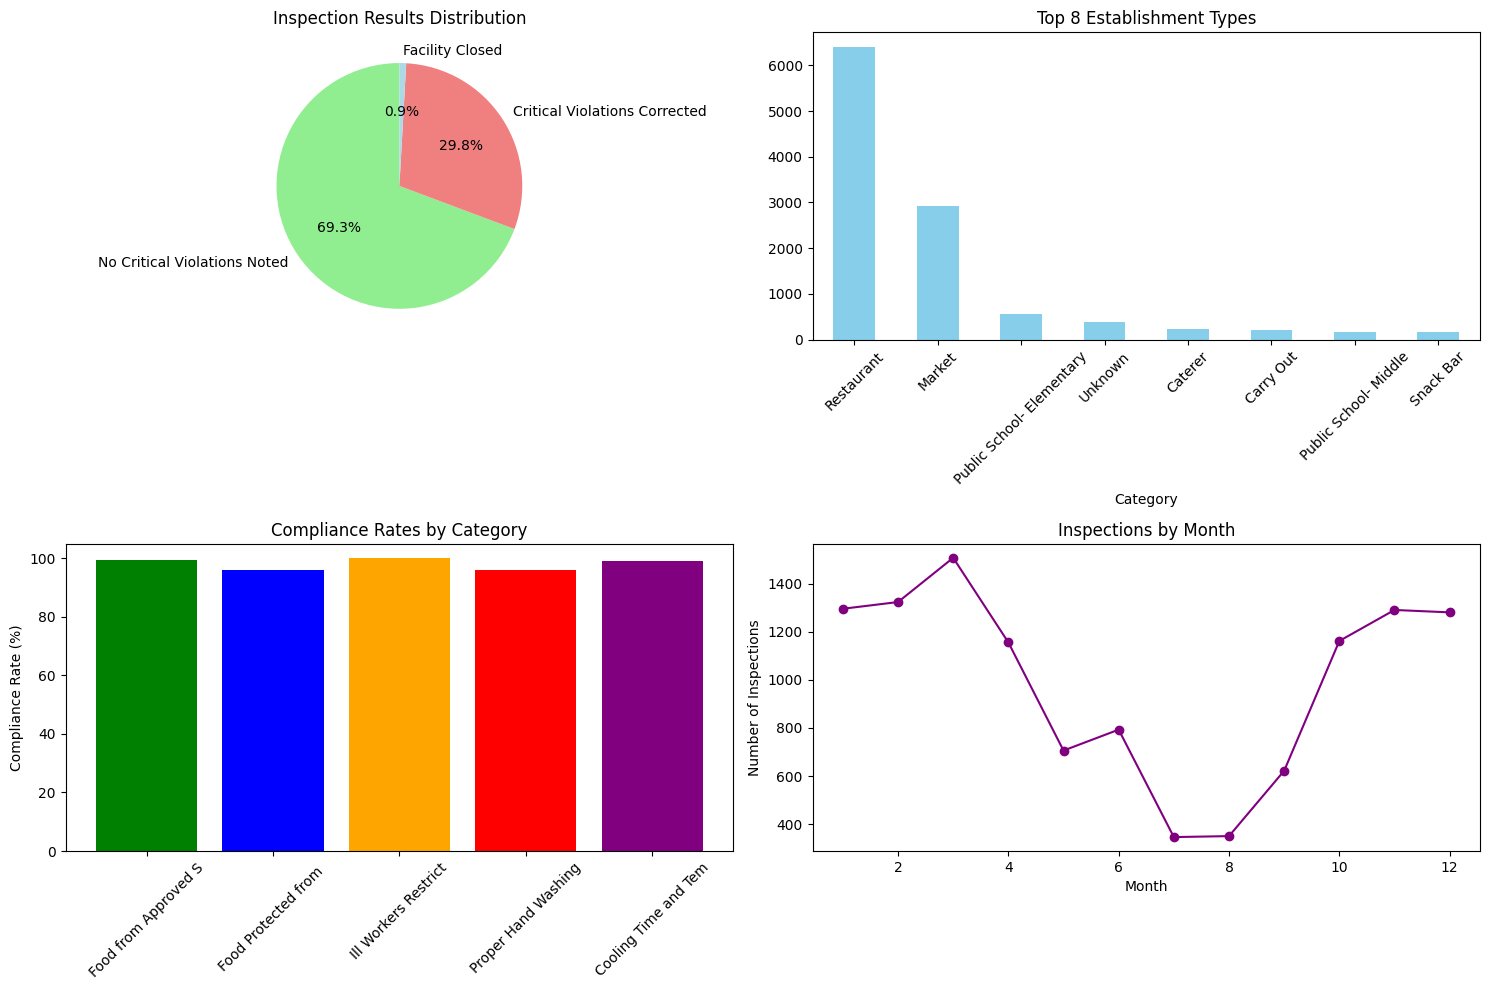


📊 SUMMARY STATISTICS:
Total Inspections: 11,835
Unique Establishments: 4,160
Critical Violation Rate: 99.1%
Most Common Type: Restaurant
Date Range: 2022-10-05 to 2024-10-03

💾 Saving results...
📥 Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 ANALYSIS COMPLETE!
Downloaded files:
1. 📄 cleaned_food_data.csv - Cleaned dataset
2. 🖼️  food_inspection_results.png - Analysis charts
3. 📋 analysis_summary.txt - Summary report


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Upload the file
print("📁 Upload Food_Inspection.csv file:")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")

# Basic data cleaning
print("\n🧹 Cleaning data...")
df_clean = df.copy()

# Remove duplicates
df_clean = df_clean.drop_duplicates()
print(f"Removed duplicates: {len(df) - len(df_clean)} rows")

# Fill missing values
df_clean = df_clean.fillna('Unknown')

# Convert date
df_clean['Inspection Date'] = pd.to_datetime(df_clean['Inspection Date'], errors='coerce')

print("✅ Data cleaning completed!")

# ANALYSIS
print("\n📈 Analyzing data...")

# 1. Inspection Results
results = df_clean['Inspection Results'].value_counts()
print("\n🔍 Inspection Results:")
print(results)

# 2. Establishment Types
types = df_clean['Category'].value_counts().head(10)
print("\n🏢 Top 10 Establishment Types:")
print(types)

# 3. Find compliance columns
compliance_cols = [col for col in df_clean.columns if '(C)' in col]
print(f"\n📋 Found {len(compliance_cols)} compliance categories")

# 4. Critical violations
critical = df_clean[df_clean['Inspection Results'].str.contains('Critical', na=False)]
critical_rate = len(critical) / len(df_clean) * 100
print(f"\n⚠️  Critical violation rate: {critical_rate:.1f}%")

# VISUALIZATIONS
print("\n🎨 Creating visualizations...")

plt.figure(figsize=(15, 10))

# Plot 1: Inspection Results
plt.subplot(2, 2, 1)
results.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightblue', 'yellow'])
plt.title('Inspection Results Distribution')
plt.ylabel('')

# Plot 2: Top Establishment Types
plt.subplot(2, 2, 2)
types.head(8).plot(kind='bar', color='skyblue')
plt.title('Top 8 Establishment Types')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot 3: Compliance Analysis (sample of first 5 compliance categories)
plt.subplot(2, 2, 3)
compliance_rates = []
compliance_names = []

for col in compliance_cols[:5]:  # First 5 compliance categories
    in_comp = (df_clean[col] == 'In Compliance').sum()
    total = len(df_clean[col])
    rate = (in_comp / total) * 100 if total > 0 else 0
    compliance_rates.append(rate)
    # Shorten long names
    short_name = col.replace('(C)', '').strip()[:20]
    compliance_names.append(short_name)

plt.bar(compliance_names, compliance_rates, color=['green', 'blue', 'orange', 'red', 'purple'])
plt.title('Compliance Rates by Category')
plt.xticks(rotation=45)
plt.ylabel('Compliance Rate (%)')

# Plot 4: Monthly inspections
plt.subplot(2, 2, 4)
if 'Inspection Date' in df_clean.columns:
    df_clean['Month'] = df_clean['Inspection Date'].dt.month
    monthly = df_clean['Month'].value_counts().sort_index()
    monthly.plot(kind='line', marker='o', color='purple')
    plt.title('Inspections by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Inspections')
else:
    plt.text(0.5, 0.5, 'No date data', ha='center', va='center')
    plt.title('Inspections by Month')

plt.tight_layout()
plt.savefig('food_inspection_results.png', dpi=300, bbox_inches='tight')
plt.show()

# SUMMARY STATISTICS
print("\n📊 SUMMARY STATISTICS:")
print("=" * 50)
print(f"Total Inspections: {len(df_clean):,}")
print(f"Unique Establishments: {df_clean['Establishment ID'].nunique():,}")
print(f"Critical Violation Rate: {critical_rate:.1f}%")
print(f"Most Common Type: {types.index[0]}")
print(f"Date Range: {df_clean['Inspection Date'].min().date()} to {df_clean['Inspection Date'].max().date()}")

# SAVE AND DOWNLOAD
print("\n💾 Saving results...")

# Save cleaned data
df_clean.to_csv('cleaned_food_data.csv', index=False)

# Create simple report
report = f"""
FOOD INSPECTION ANALYSIS REPORT
Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}

KEY FINDINGS:
- Total inspections analyzed: {len(df_clean):,}
- Critical violation rate: {critical_rate:.1f}%
- Most common establishment: {types.index[0]}
- Top 3 results: {', '.join([f'{k} ({v})' for k, v in results.head(3).items()])}

RECOMMENDATIONS:
1. Focus on establishments with high critical violation rates
2. Monitor {types.index[0]} establishments more frequently
3. Target education for common compliance issues
"""

with open('analysis_summary.txt', 'w') as f:
    f.write(report)

# Download files
print("📥 Downloading files...")
files.download('cleaned_food_data.csv')
files.download('food_inspection_results.png')
files.download('analysis_summary.txt')

print("\n🎉 ANALYSIS COMPLETE!")
print("Downloaded files:")
print("1. 📄 cleaned_food_data.csv - Cleaned dataset")
print("2. 🖼️  food_inspection_results.png - Analysis charts")
print("3. 📋 analysis_summary.txt - Summary report")